<a href="https://colab.research.google.com/github/GhofranTayeb/MachineLearning/blob/main/GhofranTayeb_WafaKatar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House prices prediction**








# **Abstract**
House prices are constantly fluctuating, making accurate prediction essential for homebuyers, real estate investors, and the economy as a whole. This study investigates the key factors influencing residential property values and presents a methodology for predicting house prices in Ames, Iowa, using machine learning regression techniques. The process involves correlation analysis, feature engineering, and model development on a dataset comprising nearly all relevant features of residential homes in the region. The dataset was originally split into the training set and the test set.

Six models are evaluated: Lasso Regression, Linear Regression, Ridge Regression, Decision Tree, Random Forest, and XGBoost Regressor. These models are assessed using performance metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared ($R^2$). Among the evaluated models, Linear Regression achieved the best overall performance on the test set, with an RMSE of 0.1276, MAE of 0.0894, and an $R^2$ score of 0.9128.

The final model was deployed as an interactive web application using Streamlit, providing a practical tool for predicting house prices and aiding real estate decision-making.

# **Introduction**

This project focuses on predicting house sale prices in Ames, Iowa, using a dataset containing 79 explanatory variables. The goal is to apply regression techniques and feature engineering to build a model that accurately predicts the SalePrice of residential homes. The evaluation metric for this project is the Root-Mean-Squared-Error (RMSE) of the logarithm of predicted and observed prices, ensuring fair treatment of errors across all price ranges.


# **Dataset**
Source: Kaggle’s House Prices: Advanced Regression Techniques competition.
Features: Over 80 features, including:\newline
• LotArea
• YearBuilt
• OverallQual
• GarageArea.
Target Variable: SalePrice (continuous numerical value).

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import seaborn as sns
sns.set(style="ticks")

**Google Drive**

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dataset_path = '/content/drive/MyDrive/train.csv'  # Assign the path to dataset_path
dataset_test_path = '/content/drive/MyDrive/test.csv' # Assign the path to dataset_test_path

Mounted at /content/drive


# **Exploratory Data Analysis: Dataset Structure and Basic Informatione**




In [25]:
dataset = pd.read_csv(dataset_path) # Load data from the file path
dataset_test = pd.read_csv(dataset_test_path) # Load data from the file path
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Data Snapshot:**

In [26]:
dataset.shape

(1460, 81)

**Metadata Insights:**

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
type(dataset)

pandas.core.frame.DataFrame

In [29]:
dataset.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [30]:
dataset.isnull().sum().sum()

np.int64(7829)

**Descriptive Statistics Overview of the Dataset (Summary Statistics)**

In [31]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
categorical_columns = dataset.select_dtypes(include=['object']).columns

numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

numerical_dataset = dataset[numerical_columns]

# **Explanation**

 code snippet demonstrates data preprocessing steps to handle missing values (NA/NaN) in a dataset by:

Categorical Columns (e.g., Alley, GarageType, etc.):

Replaces missing values (NA) with the string "None" (indicating the absence of a feature, like no garage or no basement).

Numerical Columns:

LotFrontage: Fills missing values with the median of the column (robust to outliers).

Other numerical fields (e.g., BsmtFinSF1, MasVnrArea, etc.): Replaces NA with 0 (assuming missing = no square footage/bathrooms).

Key Notes:
Typos in Code: filna should be fillna (Pandas function).

Purpose: Ensures the dataset is clean for machine learning/models by addressing missing data systematically.

Context: Common in real estate/structured datasets (e.g., housing prices) where missing values imply non-existent features.

In [33]:
na_to_none_columns = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

# Replace "NA" with "None" in these columns
for col in na_to_none_columns:
    if col in dataset.columns:
        dataset[col] = dataset[col].fillna("None")

In [34]:
if 'LotFrontage' in dataset.columns:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

if 'MasVnrArea' in dataset.columns:
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

if 'MasVnrType' in dataset.columns:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna("None")

if 'BsmtFullBath' in dataset.columns:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)

if 'BsmtHalfBath' in dataset.columns:
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)

if 'BsmtFinSF1' in dataset.columns:
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)

if 'BsmtFinSF2' in dataset.columns:
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0)

if 'BsmtUnfSF' in dataset.columns:
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)

if 'TotalBsmtSF' in dataset.columns:
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)

if 'GarageYrBlt' in dataset.columns:
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)

if 'GarageCars' in dataset.columns:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

if 'GarageArea' in dataset.columns:
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)
if 'Electrical' in dataset.columns:
    dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

if 'SaleType' in dataset.columns:
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

if 'Exterior1st' in dataset.columns:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])

if 'Exterior2nd' in dataset.columns:
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

if 'KitchenQual' in dataset.columns:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

In [36]:
dataset[dataset['Street'] == 0.0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [35]:
dataset[dataset['MasVnrArea'] == 0.0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [38]:
dataset['SalePrice'].value_counts()

,count
SalePrice,
140000,20
135000,17
145000,14
155000,14
190000,13
...,...
223000,1
257000,1
282922,1


In [37]:
dataset['Street'].value_counts()

,count
Street,
Pave,1454
Grvl,6


In [15]:
dataset['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


In [16]:
dataset.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,None,1369
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


Zoning Category Counts (MSZoning):

The output shows the absolute frequency of each zoning classification in the dataset:

RL (Residential Low Density): 1,151 entries (most common).

RM (Residential Medium Density): 218 entries.

FV (Floating Village Residential): 65 entries.

RH (Residential High Density): 16 entries.

C (all) (Commercial): 10 entries (rarest).

Purpose: Understand the distribution of zoning types, which could impact modeling (e.g., predicting housing prices).

Missing Value Heatmap (msno.heatmap):

Visualizes patterns of missing data across columns.

Darker spots = missing values; correlations between missingness in different columns (e.g., if PoolQC is missing, PoolArea might also be missing).

Purpose: Identify systemic gaps in data (e.g., certain features unrecorded for older homes).

Key Notes:
Typo: dtype: im64 should be int64 (integer data type).

Context: Common in exploratory data analysis (EDA) for structured datasets (e.g., real estate)

In [17]:
dataset.MSZoning.value_counts(normalize = False)

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


# **📊 Title: Exploratory Data Analysis (EDA) of Housing Dataset**



🧮 Section 1: Histograms (Top Half)
Histograms are used to visualize the distribution of numerical variables. Each chart displays how frequently values appear in the dataset.

Some examples:

Id: Identifiers of the houses.

LotFrontage: Distance of the house frontage to the street.

OverallQual & OverallCond: Ratings of overall material and finish quality.

YearBuilt, YearRemodAdd: Construction and renovation years.

GrLivArea: Above ground living area in square feet.

MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF: Various basement and masonry veneer square footage.

These help detect:

Skewed distributions

Outliers

Data ranges

📘 Mathematical Representation (Histogram):

Frequency
(
𝑥
𝑖
)
=
Number of occurrences of value
𝑥
𝑖
 in the dataset
Frequency(x
i
​
 )=Number of occurrences of value x
i
​
  in the dataset

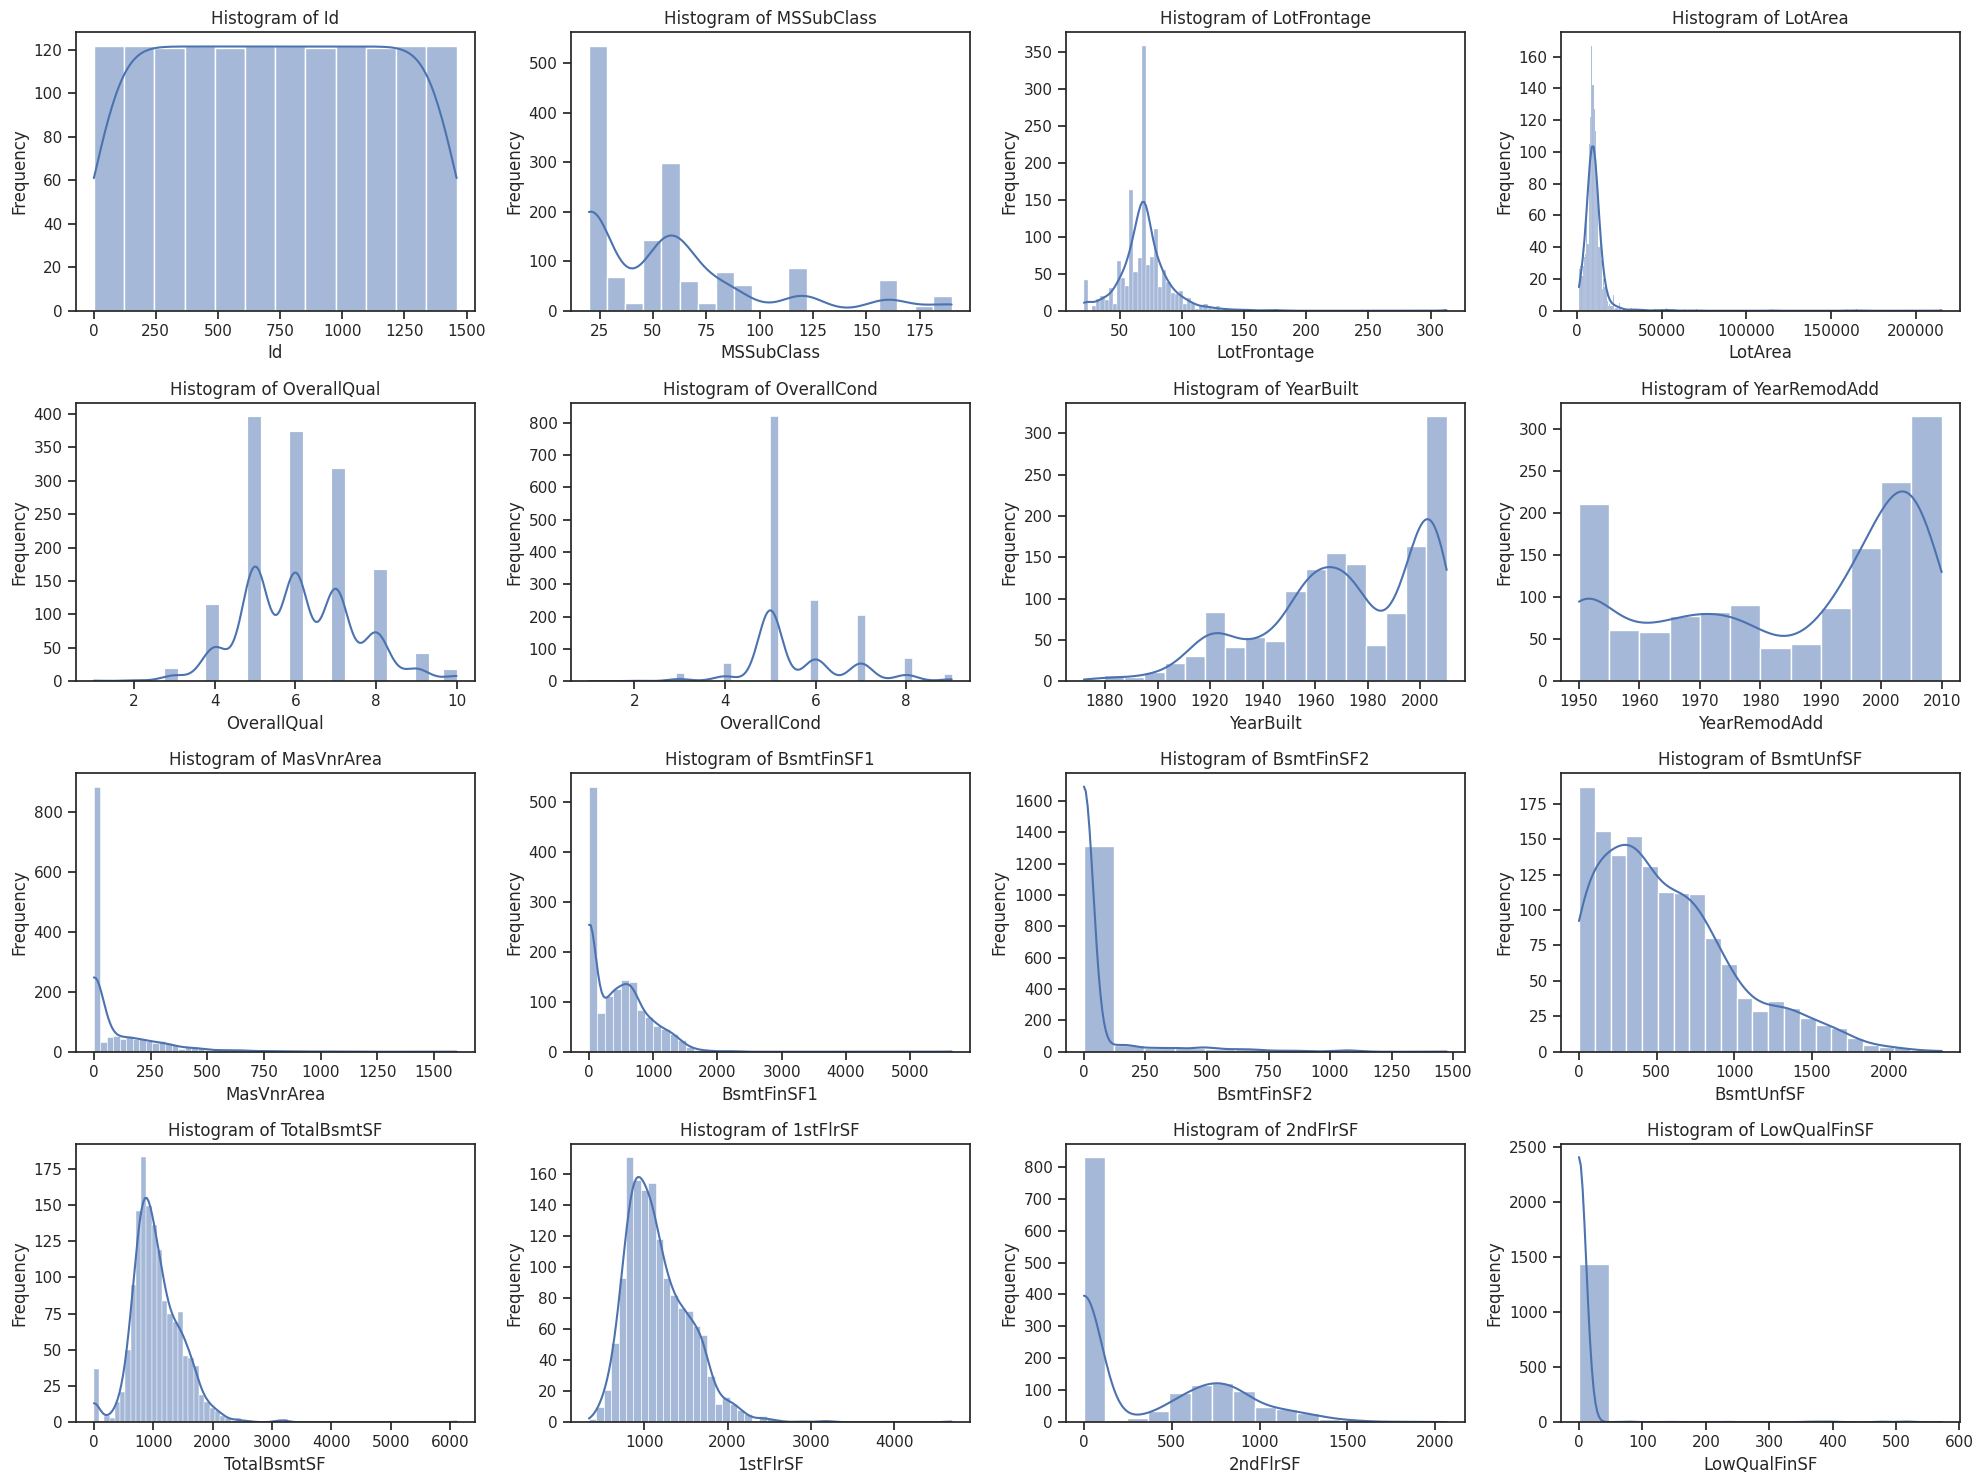

In [18]:
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

num_rows, num_cols = 4, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    if i >= len(axes):
        break
    ax = axes[i]
    sns.histplot(dataset[column], kde=True, ax=ax)
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

📊 Section 2: Bar Charts (Bottom Half)
Bar charts are used for categorical variables to show the count of each category.

Examples:

MSZoning, Street, Alley: Zoning classification, street types, and alley access.

LotShape, LandContour, Utilities: Property shape, land flatness, utility availability.

Neighborhood, Condition1, Condition2, BldgType: Area location, proximity to conditions, and building type.

These help understand:

Class distribution

Imbalanced data

Rare categories

📘 Mathematical Representation (Bar Chart):

Count
(
𝑐
𝑗
)
=
Number of samples in category
𝑐
𝑗
Count(c
j
​
 )=Number of samples in category c
j

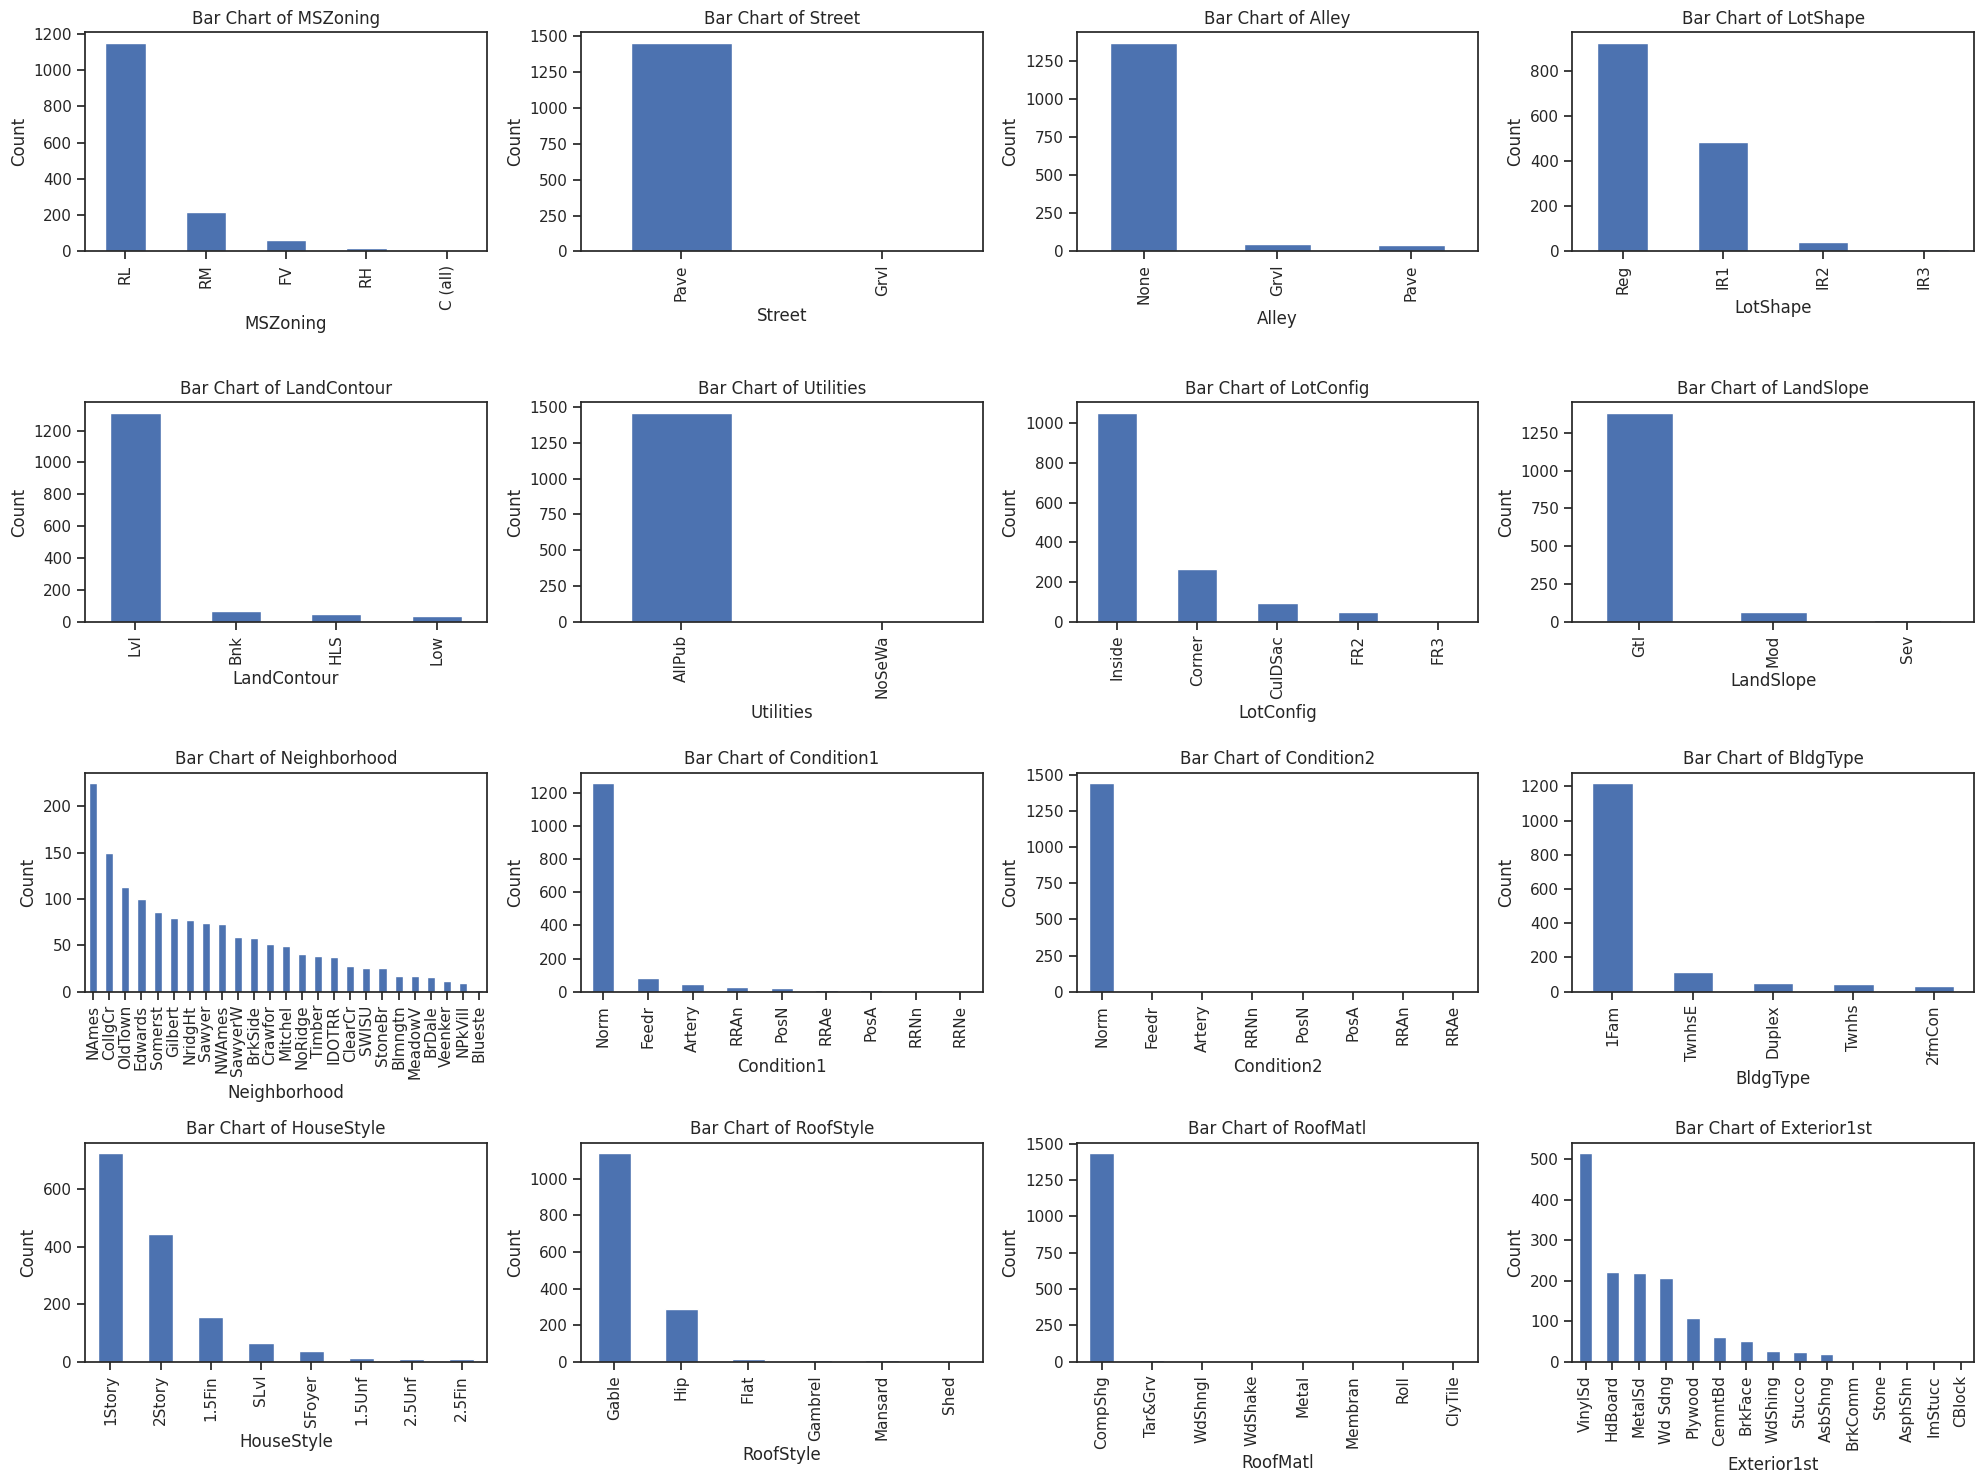

In [19]:
categorical_columns = dataset.select_dtypes(include=['object']).columns

num_rows, num_cols = 4, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    if i >= len(axes):
        break
    ax = axes[i]
    dataset[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Bar Chart of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# **📊 Title: Correlation Analysis and Model Preparation for Housing Dataset**

🔥 Section 1: Correlation Heatmap
A correlation heatmap visualizes the relationships between numerical features using a Pearson correlation matrix.

The values range from -1 to +1:

+1 = perfect positive correlation

0 = no correlation

-1 = perfect negative correlation

Darker red = strong positive correlation

Darker blue = strong negative correlation

🧮 Mathematical Equation (Pearson Correlation Coefficient):
𝑟
𝑥
𝑦
=
∑
(
𝑥
𝑖
−
𝑥
ˉ
)
(
𝑦
𝑖
−
𝑦
ˉ
)
∑
(
𝑥
𝑖
−
𝑥
ˉ
)
2
∑
(
𝑦
𝑖
−
𝑦
ˉ
)
2
r
xy
​
 =
∑(x
i
​
 −
x
ˉ
 )
2
 ∑(y
i
​
 −
y
ˉ
​
 )
2

​

∑(x
i
​
 −
x
ˉ
 )(y
i
​
 −
y
ˉ
​
 )
​

This matrix is useful for:

Detecting multicollinearity

Identifying variables highly correlated with the target (SalePrice, for example) **texte en gras**

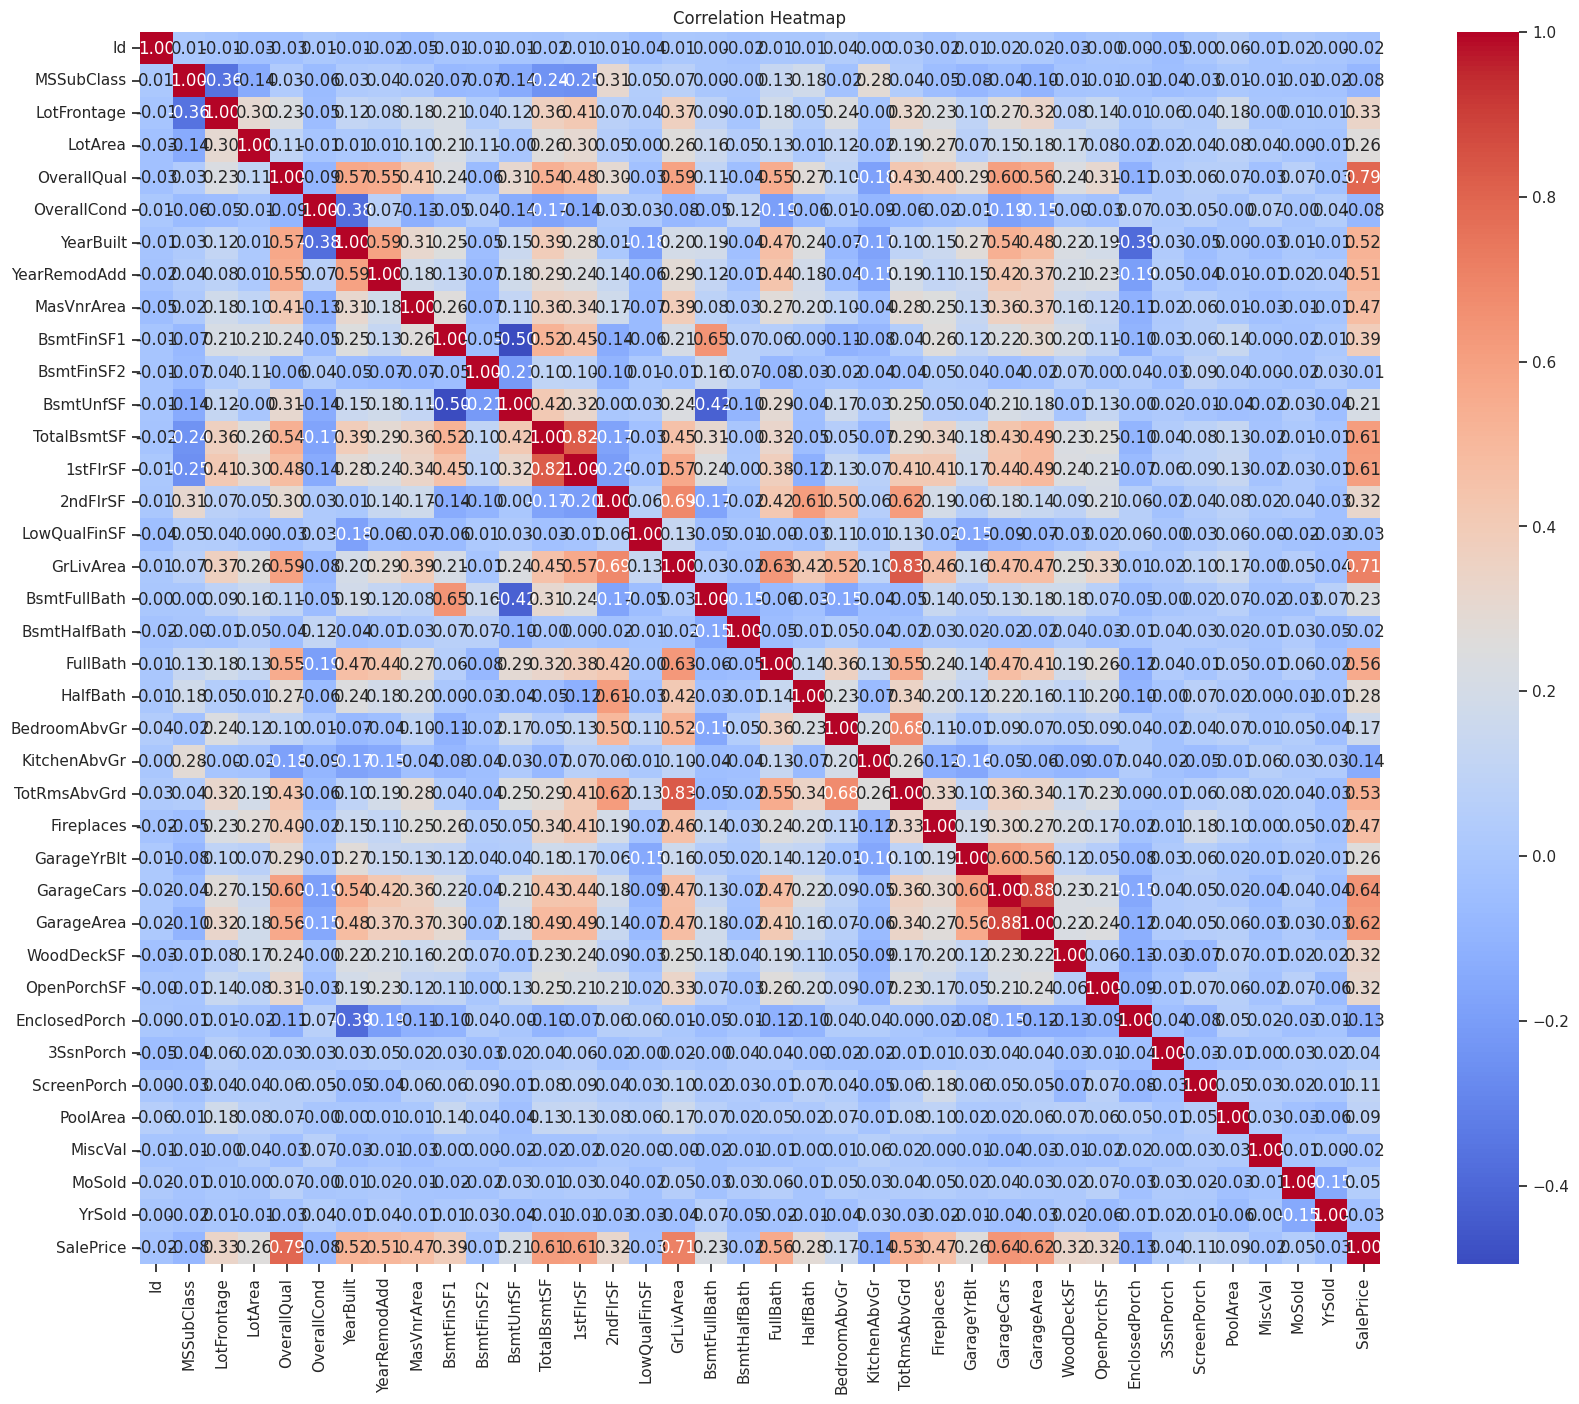

In [20]:
# Filter only numerical columns
numerical_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_dataset.corr()

# Visualize heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


📋 Section 2: Dataset Sample (Head)
Displays the first few rows of the dataset:

Shows a mix of numerical and categorical features (e.g., MSZoning, Street, Alley, LotShape, etc.).

Used to inspect and clean data before modeling.

🤖 Section 3: Machine Learning Code (Random Forest)
Steps Explained:
Imports:

train_test_split, RandomForestClassifier, classification_report from sklearn.

Label Encoding:

Categorical columns are encoded using LabelEncoder to convert text data into numeric format.

Data Splitting:

Dataset is split into training and testing sets using train_test_split() with test_size=0.2.

Model Initialization:

A Random Forest Classifier is created to fit the data.

Random forest is an ensemble method using many decision trees.

🧮 Random Forest Concept:
𝑦
^
=
majority vote of
{
ℎ
1
(
𝑥
)
,
ℎ
2
(
𝑥
)
,
.
.
.
,
ℎ
𝑛
(
𝑥
)
}
y
^
​
 =majority vote of {h
1
​
 (x),h
2
​
 (x),...,h
n
​
 (x)}
Where
ℎ
𝑖
(
𝑥
)
h
i
​
 (x) are individual decision trees. **texte en gras**

In [21]:
import seaborn as sns
sns.set(style="whitegrid")

In [22]:
X = dataset.iloc[:,0:80]
y = dataset.iloc[:,80]
y.head()
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


# Title: Model Evaluation & Outlier Detection in Housing Dataset

🧠 1. Model Evaluation with RandomForestClassifier
The model is trained to predict housing sale conditions such as Normal, Abnorml, Partial, etc.

✅ Steps:
Model: RandomForestClassifier

Evaluation Metrics:

Confusion Matrix: A table showing how many correct vs incorrect predictions were made for each class.

Classification Report:

Precision: How many predicted labels are actually correct.

Recall: How many actual labels were correctly predicted.

F1-score: Harmonic mean of precision and recall.

Support: Number of actual instances for each class.

📘 Confusion Matrix Equation (for class i):
Precision
𝑖
=
TP
𝑖
TP
𝑖
+
FP
𝑖
,
Recall
𝑖
=
TP
𝑖
TP
𝑖
+
FN
𝑖
,
F1
𝑖
=
2
⋅
Precision
𝑖
⋅
Recall
𝑖
Precision
𝑖
+
Recall
𝑖
Precision
i
​
 =
TP
i
​
 +FP
i
​

TP
i
​

​
 ,Recall
i
​
 =
TP
i
​
 +FN
i
​

TP
i
​

​
 ,F1
i
​
 =
Precision
i
​
 +Recall
i
​

2⋅Precision
i
​
 ⋅Recall
i
​

​

Where:

TP = True Positive

FP = False Positive

FN = False Negative ****

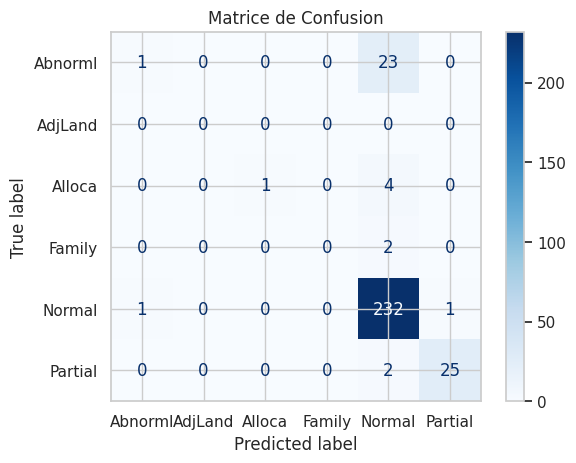

              precision    recall  f1-score   support

     Abnorml       0.50      0.04      0.08        24
      Alloca       1.00      0.20      0.33         5
      Family       0.00      0.00      0.00         2
      Normal       0.88      0.99      0.93       234
     Partial       0.96      0.93      0.94        27

    accuracy                           0.89       292
   macro avg       0.67      0.43      0.46       292
weighted avg       0.85      0.89      0.85       292



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Exemple : on suppose que 'target_column' est la colonne à prédire
target_column = 'SaleCondition'  # à adapter selon ton cas
features = dataset.drop(columns=[target_column])
labels = dataset[target_column]

# Encodage des variables catégorielles (nécessaire avant d'entraîner le modèle)
features = pd.get_dummies(features)

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

# Rapport de classification (optionnel mais utile)
print(classification_report(y_test, y_pred))


📉 2. Outlier Detection
This section defines functions to detect outliers in numerical columns using the IQR (Interquartile Range) method.

✅ Steps:
Function outlier_detection:

Calculates:

Q1 (25th percentile)

Q3 (75th percentile)

IQR = Q3 - Q1

Outlier range = below
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or above
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR

Function outliers_dict:

Applies the above function to all numeric columns.

Prints columns where outliers are found.

📘 IQR Outlier Formula:
Outliers
=
𝑥
<
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
or
𝑥
>
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Outliers=x<Q1−1.5×IQRorx>Q3+1.5×IQR

In [24]:
def IQR_outlier_detection(dataset):

    (dataset)

    Q1,Q3 = np.percentile(dataset, [25,75])
    IQR = Q3 - Q1

    lower_range = Q1 - (1.5 * IQR)

    upper_range = Q3 + (1.5 * IQR)

    return lower_range, upper_range

In [25]:
outliers_dict = {}

for column in numerical_columns:
    feature = numerical_dataset[column]
    lowerbound, upperbound = IQR_outlier_detection(feature)

    outliers = [value for value in feature if value < lowerbound or value > upperbound]

    outliers_dict[column] = outliers

    if outliers:
        print(f"Feature: {column}")
        print(f"Outliers detected: {outliers}\n")

Feature: MSSubClass
Outliers detected: [190, 190, 160, 180, 160, 190, 160, 190, 160, 190, 160, 160, 160, 160, 160, 160, 160, 160, 160, 190, 160, 190, 190, 190, 190, 160, 160, 160, 190, 160, 160, 180, 180, 190, 180, 160, 160, 160, 190, 190, 160, 160, 160, 180, 160, 190, 190, 180, 160, 160, 160, 160, 190, 190, 190, 160, 160, 160, 160, 160, 190, 160, 160, 160, 160, 160, 190, 160, 160, 190, 160, 160, 190, 160, 180, 190, 160, 160, 160, 160, 160, 190, 160, 160, 190, 190, 160, 160, 160, 160, 190, 160, 180, 160, 160, 160, 160, 160, 160, 190, 190, 180, 180]

Feature: LotFrontage
Outliers detected: [110.0, 108.0, 112.0, 115.0, 110.0, 24.0, 21.0, 121.0, 122.0, 24.0, 120.0, 134.0, 110.0, 141.0, 24.0, 24.0, 174.0, 21.0, 21.0, 174.0, 21.0, 21.0, 120.0, 30.0, 129.0, 140.0, 120.0, 118.0, 116.0, 150.0, 111.0, 21.0, 109.0, 130.0, 21.0, 24.0, 21.0, 137.0, 110.0, 21.0, 21.0, 24.0, 130.0, 24.0, 30.0, 21.0, 21.0, 21.0, 120.0, 110.0, 24.0, 24.0, 30.0, 110.0, 144.0, 114.0, 24.0, 30.0, 21.0, 128.0, 116.0, 149.

# **Boxplot Visualization of Numerical Features**

📊 Boxplot Summary (shown):
For Variables 1 to 4:

Id: Some moderate outliers.

MSSubClass: Mild skew; outliers on both ends.

LotFrontage: Several clear outliers.

LotArea: Heavy outliers; log transform helped reduce spread but some still remain.

In [26]:
import seaborn as sns
sns.set(style="whitegrid")

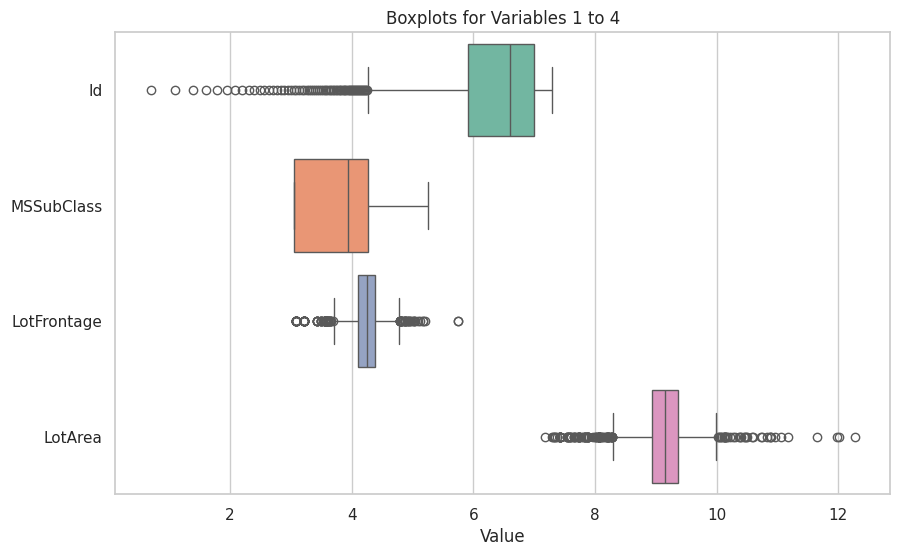

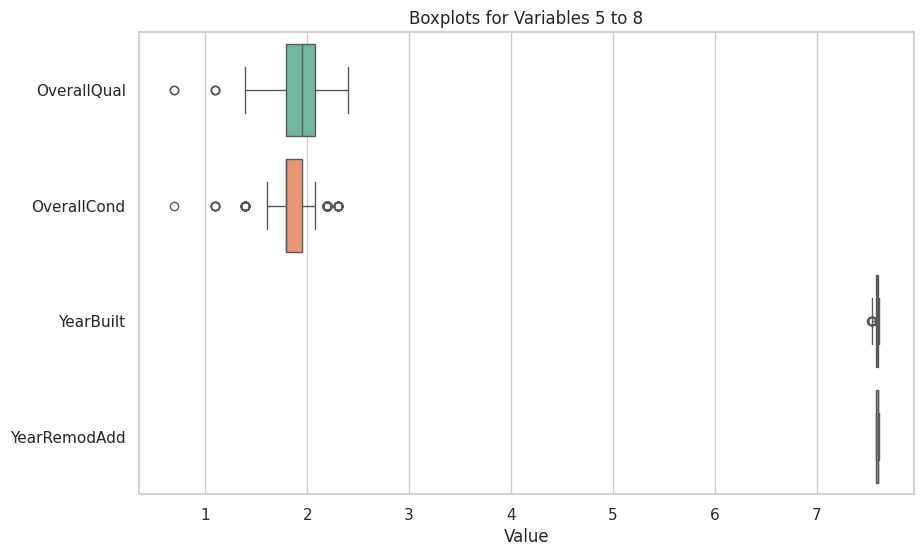

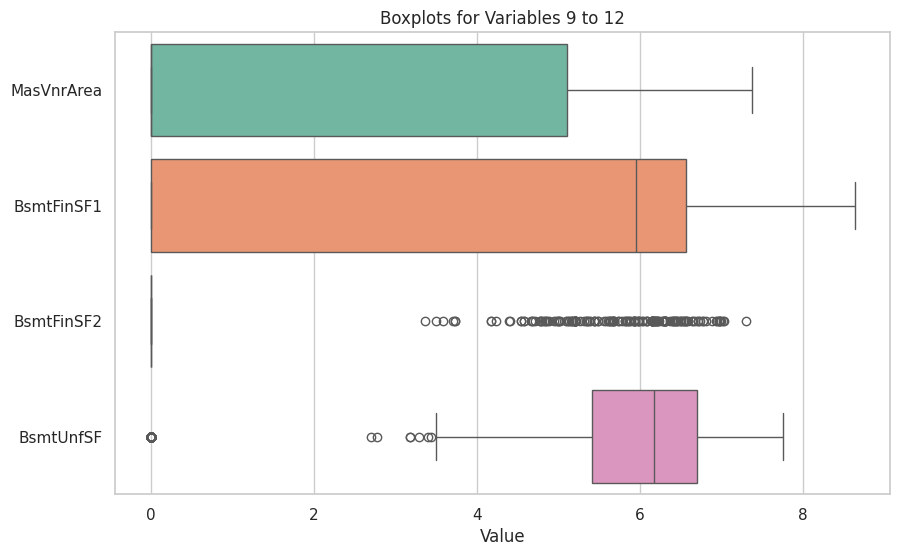

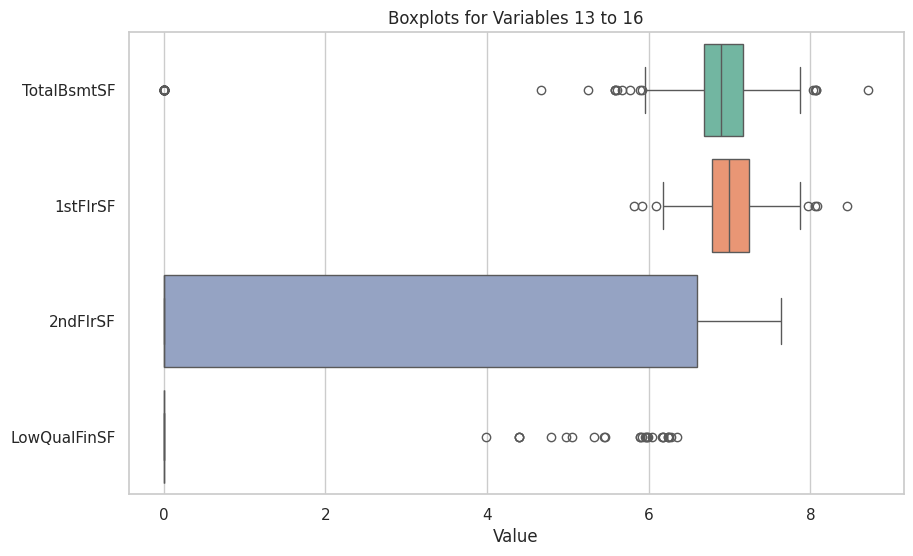

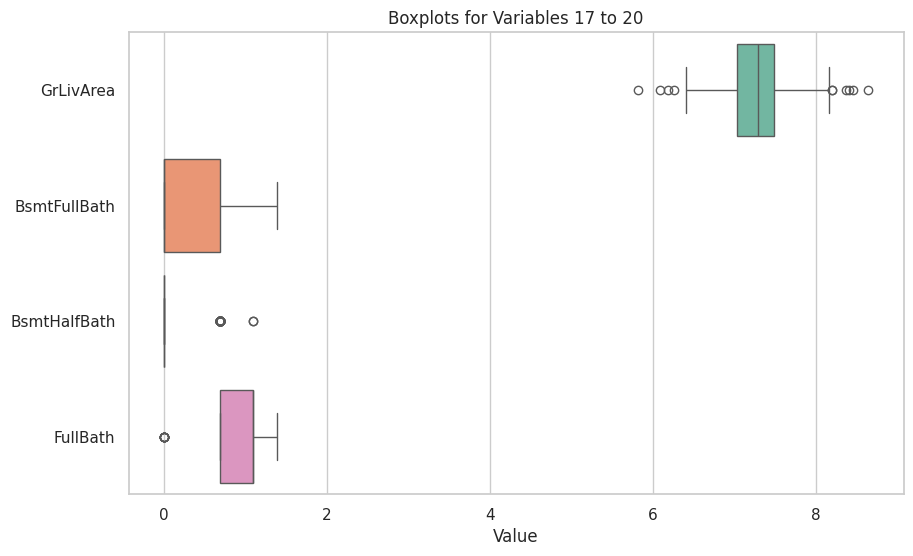

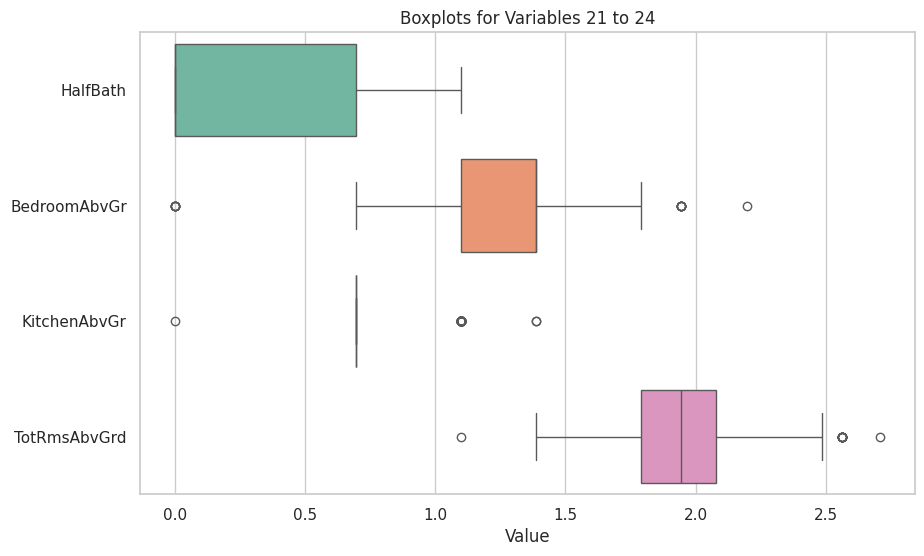

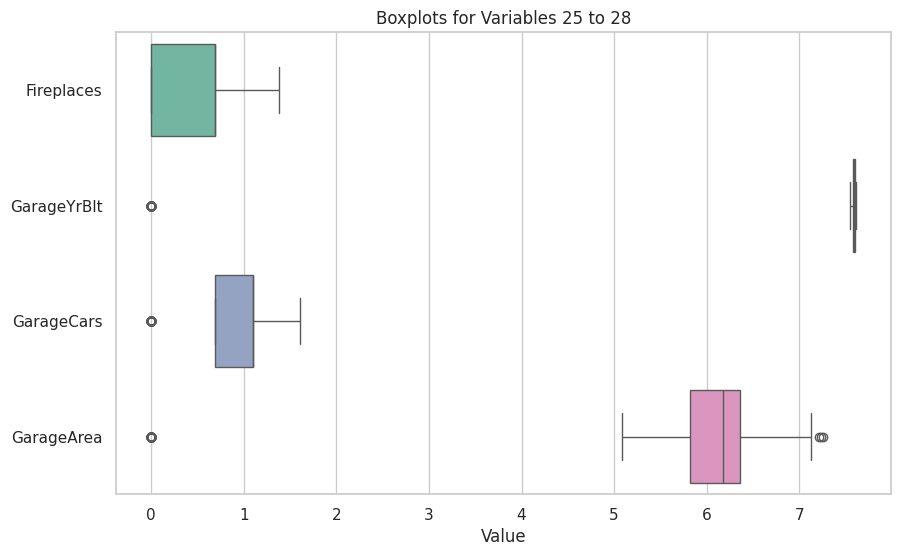

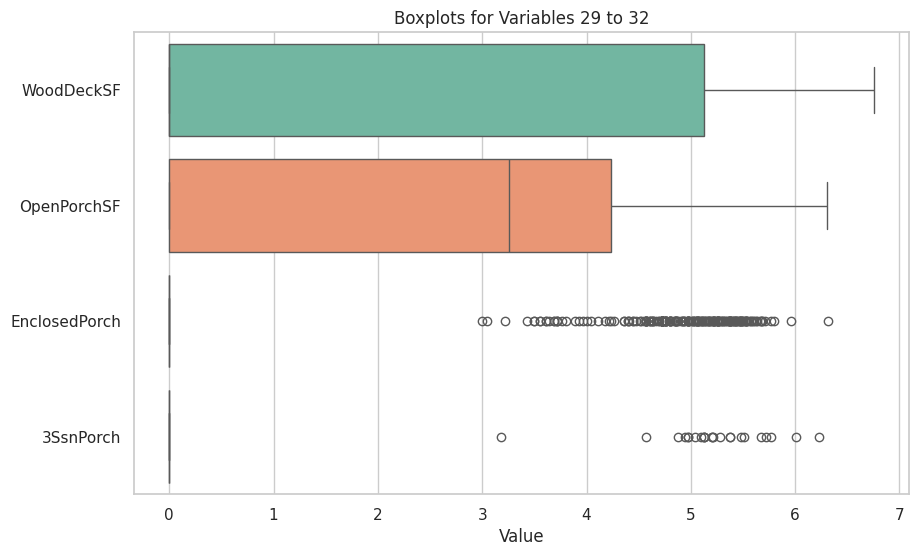

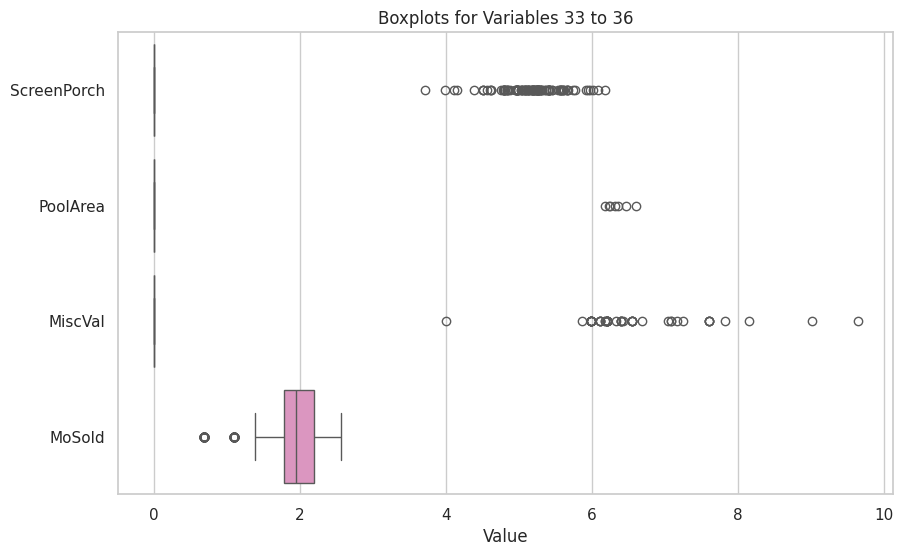

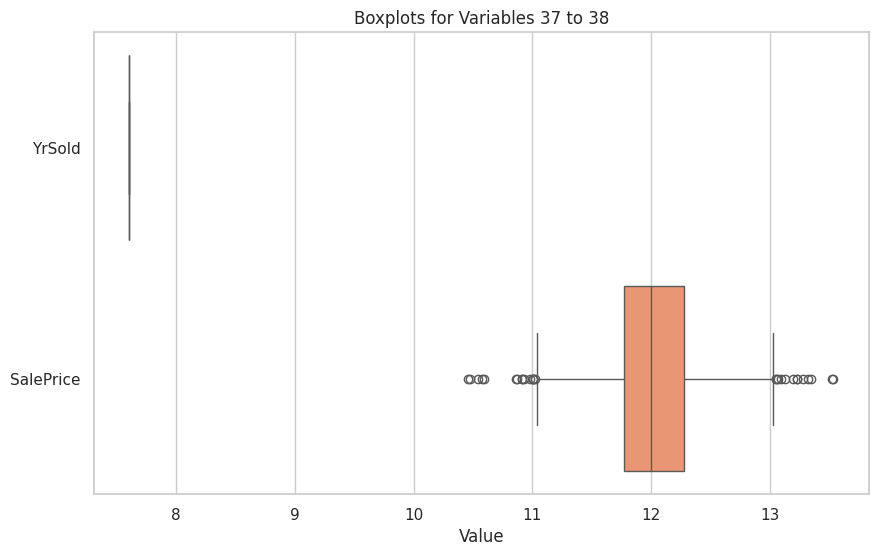

In [27]:
variables_per_plot = 4

# Loop through the numeric columns in groups of four
for i in range(0, len(numerical_dataset.columns), variables_per_plot):
    # Select the next four columns
    subset = numerical_dataset.iloc[:, i:i + variables_per_plot]
    subset = subset.apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

    # Create a horizontal boxplot for the selected columns
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=subset, orient="h", palette="Set2")
    plt.title(f"Boxplots for Variables {i+1} to {min(i+variables_per_plot, len(numerical_dataset.columns))}")
    plt.xlabel("Value")
    plt.show()

# **🧹 Preprocessing Recap**

In [35]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your complete DataFrame
# 1. Separate y (target) and X (features)
target_column = 'SalePrice'  # Replace with the actual target name if different
# Assign the 'dataset' DataFrame to 'df'
df = dataset
y = df[target_column]
X = df.drop(columns=[target_column])

# 2. Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# 3. Harmonizing columns (useful if you have separate train/test sets)
# Here, we assume everything is in df, so it's not needed yet,
# but we ensure the column order is preserved after splitting

# 4. Log transformation on y (useful if y is highly imbalanced)
y = np.log1p(y)  # log1p = log(1 + y) to avoid log(0)

# 5. Split into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preparation complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


Preparation complete:
X_train shape: (1168, 260)
X_val shape: (292, 260)
y_train shape: (1168,)
y_val shape: (292,)


# **🤖 Models Trained**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialiser les modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    print(f"--- {name} ---")
    print(f"Mean Squared Error (MSE) : {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}\n")


--- Régression Linéaire ---
Mean Squared Error (MSE) : 0.03
Root Mean Squared Error (RMSE) : 0.17

--- Gradient Boosting ---
Mean Squared Error (MSE) : 0.02
Root Mean Squared Error (RMSE) : 0.14

--- XGBoost ---
Mean Squared Error (MSE) : 0.02
Root Mean Squared Error (RMSE) : 0.15



# **📊 Model Performance:**

In [39]:


# 1. Sélection du meilleur modèle
best_model_name = min(scores, key=scores.get) # Changed to 'min' to select the model with lowest RMSE
print(f"Meilleur modèle sélectionné : {best_model_name}")

# 2. Entraînement du meilleur modèle sur l'ensemble des données
# ... (Rest of the code remains the same)

Meilleur modèle sélectionné : Gradient Boosting
